<a href="https://colab.research.google.com/github/ellie-winer/AnalyzeUSDeaths-Portfolio19/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [2]:
%pip install --upgrade plotly

## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(f"Median Household Income 2015 shape/rows and columns:{df_hh_income.shape} ")
print(f"Median Household Income 2015 column names: {df_hh_income.columns}")
print(f"Median Household Income 2015 NaN and duplicates: {df_hh_income.isna().values.any()} {df_hh_income.duplicated().values.any()}")

Median Household Income 2015 shape/rows and columns:(29322, 3) 
Median Household Income 2015 column names: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Median Household Income 2015 NaN and duplicates: True False


In [7]:
print(f"Pct People Below Poverty Level shape/rows and columns:{df_pct_poverty.shape} ")
print(f"Pct People Below Poverty Level column names: {df_pct_poverty.columns}")
print(f"Pct People Below Poverty Level NaN and duplicates:{df_pct_poverty.isna().values.any()} {df_pct_poverty.duplicated().values.any()}")

Pct People Below Poverty Level shape/rows and columns:(29329, 3) 
Pct People Below Poverty Level column names: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Pct People Below Poverty Level NaN and duplicates:False False


In [8]:
print(f"Pct Over 25 Completed HS shape/rows and columns:{df_pct_completed_hs.shape} ")
print(f"Pct Over 25 Completed HS column names:{df_pct_completed_hs.columns}")
print(f"Pct Over 25 Completed HS NaN and duplicates: {df_pct_completed_hs.isna().values.any()} {df_pct_completed_hs.duplicated().values.any()}")

Pct Over 25 Completed HS shape/rows and columns:(29329, 3) 
Pct Over 25 Completed HS column names:Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Pct Over 25 Completed HS NaN and duplicates: False False


In [9]:
print(f"Share of Race by City shape/rows and columns: {df_share_race_city.shape}")
print(f"Share of Race by City column names:{df_share_race_city.columns} ")
print(f"Share of Race by City NaN and duplicates:{df_share_race_city.isna().values.any()} {df_share_race_city.duplicated().values.any()} ")

Share of Race by City shape/rows and columns: (29268, 7)
Share of Race by City column names:Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object') 
Share of Race by City NaN and duplicates:False False 


In [10]:
print(f"Deaths by Police shape/rows and columns: {df_fatalities.shape}")
print(f"Deaths by Police column names: {df_fatalities.columns}")
print(f"Deaths by Police NaN and duplicates:{df_fatalities.isna().values.any()} {df_fatalities.duplicated().values.any()} ")

Deaths by Police shape/rows and columns: (2535, 14)
Deaths by Police column names: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
Deaths by Police NaN and duplicates:True False 


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [11]:
df_hh_income = df_hh_income.fillna(0)
print(f"cleaned Household file Nan: {df_hh_income.isna().values.any()}")

cleaned Household file Nan: False


In [12]:
df_fatalities = df_fatalities.fillna(0)
print(f"cleaned Household file Nan: {df_fatalities.isna().values.any()}")

cleaned Household file Nan: False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

<ipython-input-13-de391abe9385>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_poverty_rate_sorted['Average Poverty Rate'], y=avg_poverty_rate_sorted['State'], data=avg_poverty_rate_sorted, palette='viridis')


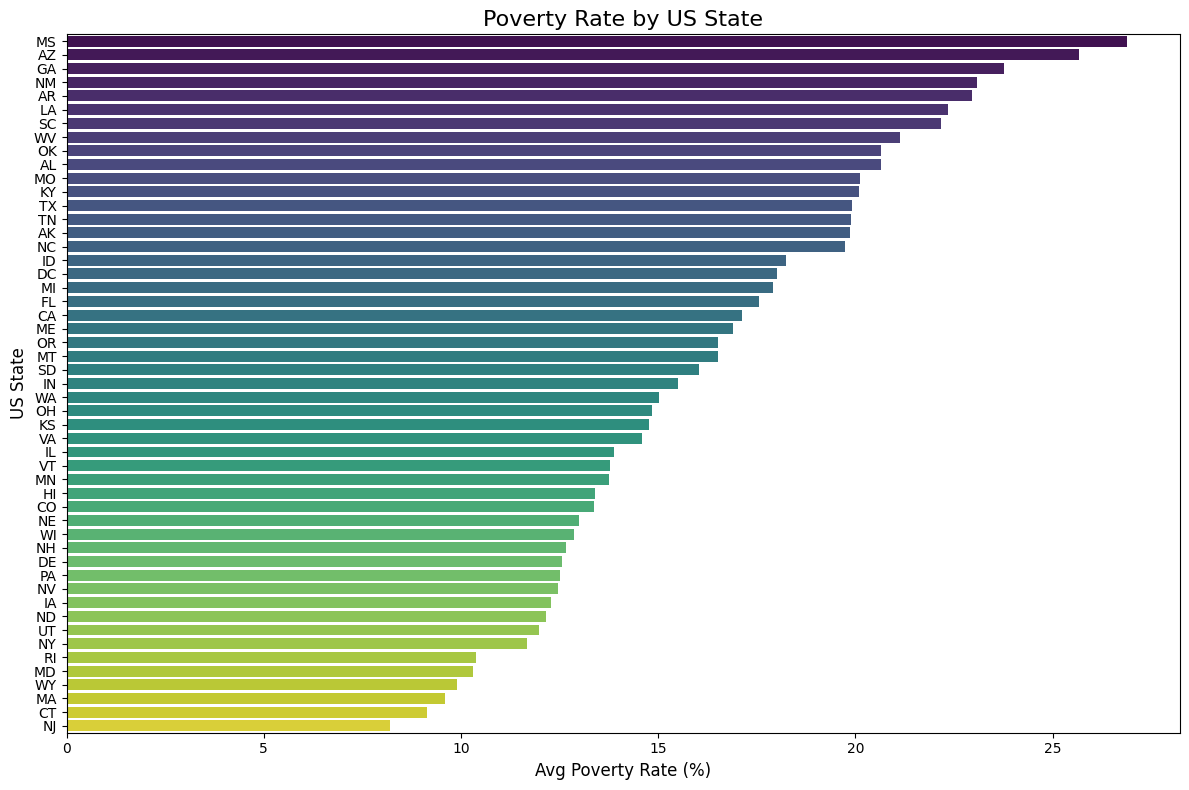

In [13]:
def average_poverty_rate_per_state(df):
    df['poverty_rate'] = pd.to_numeric(df['poverty_rate'], errors='coerce')
    avg_poverty_rate = df.groupby('Geographic Area')['poverty_rate'].mean().reset_index()
    avg_poverty_rate.columns = ['State', 'Average Poverty Rate']
    return avg_poverty_rate
avg_poverty_rate = average_poverty_rate_per_state(df_pct_poverty)
# print(avg_poverty_rate)
avg_poverty_rate_sorted = avg_poverty_rate.sort_values('Average Poverty Rate', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_poverty_rate_sorted['Average Poverty Rate'], y=avg_poverty_rate_sorted['State'], data=avg_poverty_rate_sorted, palette='viridis')

plt.title('Poverty Rate by US State', fontsize=16)
plt.xlabel('Avg Poverty Rate (%)', fontsize=12)
plt.ylabel('US State', fontsize=12)
plt.tight_layout()

plt.show()

In [14]:

print(avg_poverty_rate_sorted)
print(f"highest poverty states: {avg_poverty_rate_sorted.iloc[0]['State']}")
print(f"lowest poverty states: {avg_poverty_rate_sorted.iloc[-1]['State']}")


   State  Average Poverty Rate
25    MS                 26.88
3     AZ                 25.67
10    GA                 23.78
32    NM                 23.08
2     AR                 22.96
18    LA                 22.34
40    SC                 22.16
49    WV                 21.13
36    OK                 20.66
1     AL                 20.65
24    MO                 20.11
17    KY                 20.08
43    TX                 19.92
42    TN                 19.89
0     AK                 19.85
27    NC                 19.75
13    ID                 18.24
7     DC                 18.00
22    MI                 17.90
9     FL                 17.57
4     CA                 17.12
21    ME                 16.89
37    OR                 16.52
26    MT                 16.51
41    SD                 16.03
15    IN                 15.50
47    WA                 15.02
35    OH                 14.85
16    KS                 14.76
45    VA                 14.59
14    IL                 13.88
46    VT

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

<ipython-input-15-dda4d8ab2b0e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_hs_grad_rate_sorted['Average HS Graduation Rate'], y=avg_hs_grad_rate_sorted['State'],


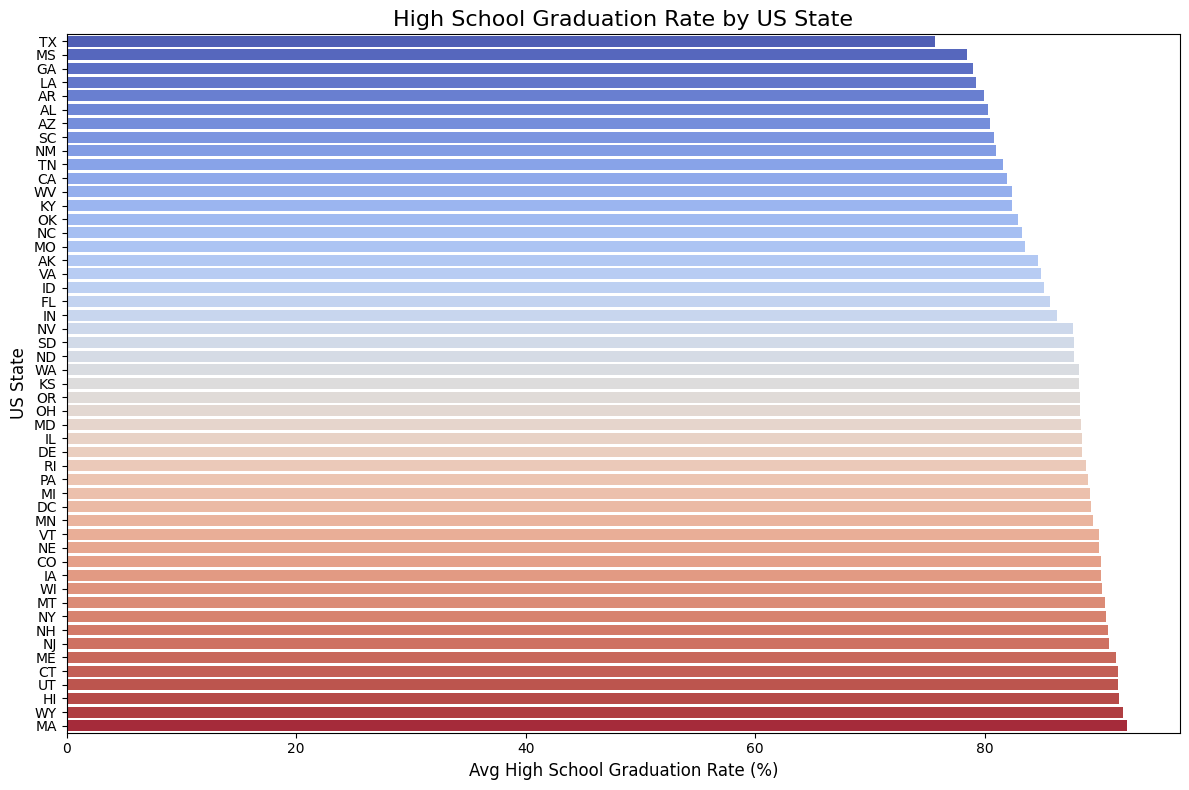

In [15]:
def average_hs_graduation_rate_per_state(df):
    df['percent_completed_hs'] = pd.to_numeric(df['percent_completed_hs'], errors='coerce')
    avg_hs_grad_rate = df.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()
    avg_hs_grad_rate.columns = ['State', 'Average HS Graduation Rate']
    return avg_hs_grad_rate
avg_hs_grad_rate = average_hs_graduation_rate_per_state(df_pct_completed_hs)
avg_hs_grad_rate_sorted = avg_hs_grad_rate.sort_values('Average HS Graduation Rate', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_hs_grad_rate_sorted['Average HS Graduation Rate'], y=avg_hs_grad_rate_sorted['State'],
            data=avg_hs_grad_rate_sorted, palette='coolwarm')

plt.title('High School Graduation Rate by US State', fontsize=16)
plt.xlabel('Avg High School Graduation Rate (%)', fontsize=12)
plt.ylabel('US State', fontsize=12)
plt.tight_layout()

plt.show()

In [16]:
print(avg_hs_grad_rate_sorted)
print(f"highest grad rate:{avg_hs_grad_rate_sorted.iloc[-1]['State']}")
print(f"lowest grad rate:{avg_hs_grad_rate_sorted.iloc[0]['State']}")

   State  Average HS Graduation Rate
43    TX                       75.69
25    MS                       78.47
10    GA                       79.01
18    LA                       79.29
2     AR                       79.95
1     AL                       80.30
3     AZ                       80.47
40    SC                       80.85
32    NM                       80.98
42    TN                       81.63
4     CA                       81.96
49    WV                       82.35
17    KY                       82.37
36    OK                       82.91
27    NC                       83.25
24    MO                       83.52
0     AK                       84.63
45    VA                       84.88
13    ID                       85.17
9     FL                       85.74
15    IN                       86.32
33    NV                       87.72
41    SD                       87.75
28    ND                       87.82
47    WA                       88.20
16    KS                       88.23
3

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [28]:
df_combined = avg_poverty_rate_sorted.merge(avg_hs_grad_rate_sorted, on='State')
df_combined = df_combined.sort_values(by='Average HS Graduation Rate', ascending=True)

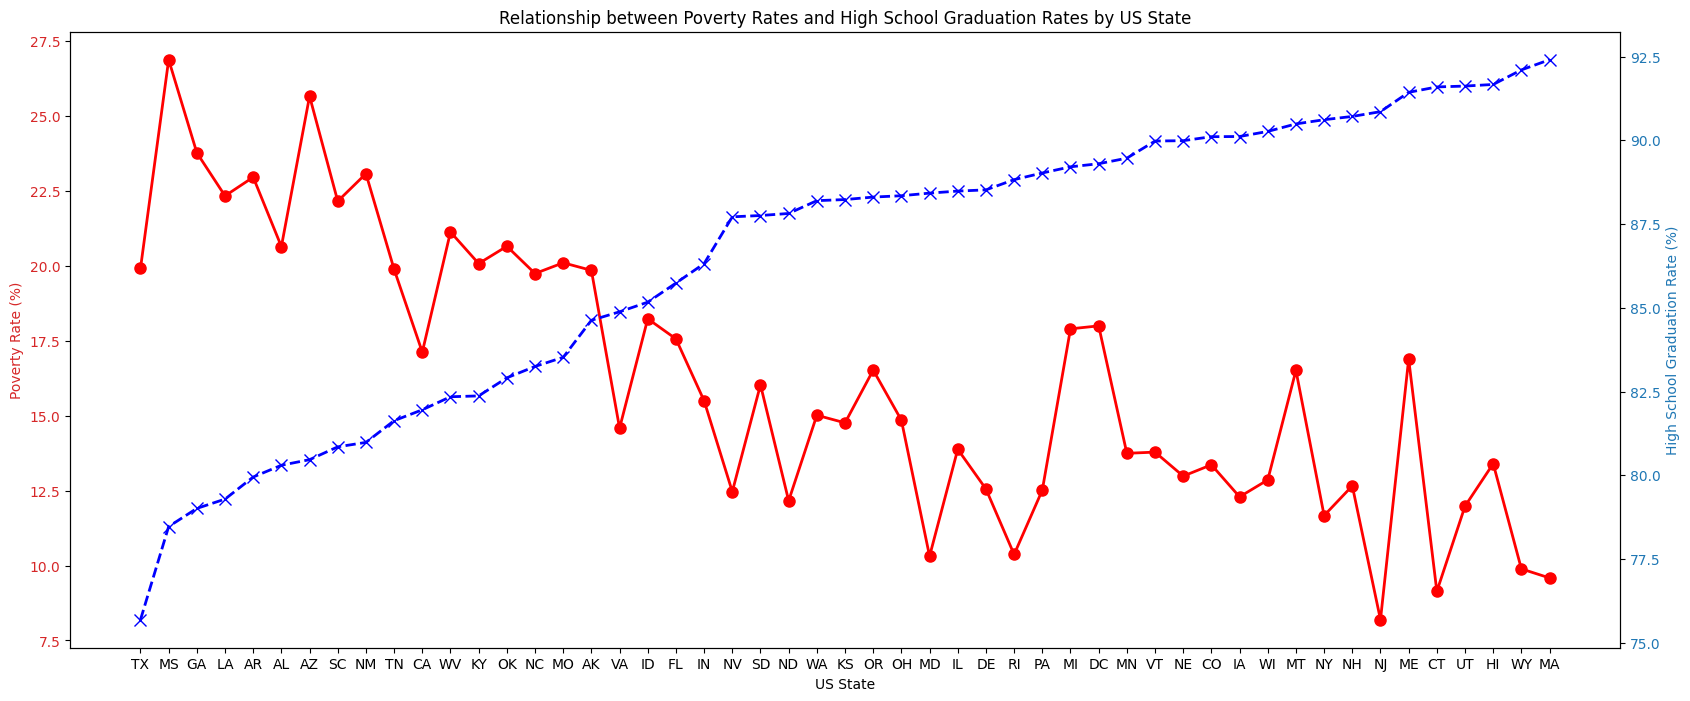

In [29]:
plt.rcParams['agg.path.chunksize'] = 2000
plt.rcParams['path.simplify_threshold'] = 1.0

plt.figure(figsize=(20,8))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_combined['State'], df_combined['Average Poverty Rate'], 'red', linestyle='-', marker='o', markersize=8, linewidth=2)
ax2.plot(df_combined['State'], df_combined['Average HS Graduation Rate'], 'blue', linestyle='--', marker='x', markersize=8, linewidth=2)

ax1.set_xlabel('US State')
ax1.set_ylabel('Poverty Rate (%)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2.set_ylabel('High School Graduation Rate (%)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.xticks(rotation=90)
plt.title('Relationship between Poverty Rates and High School Graduation Rates by US State')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

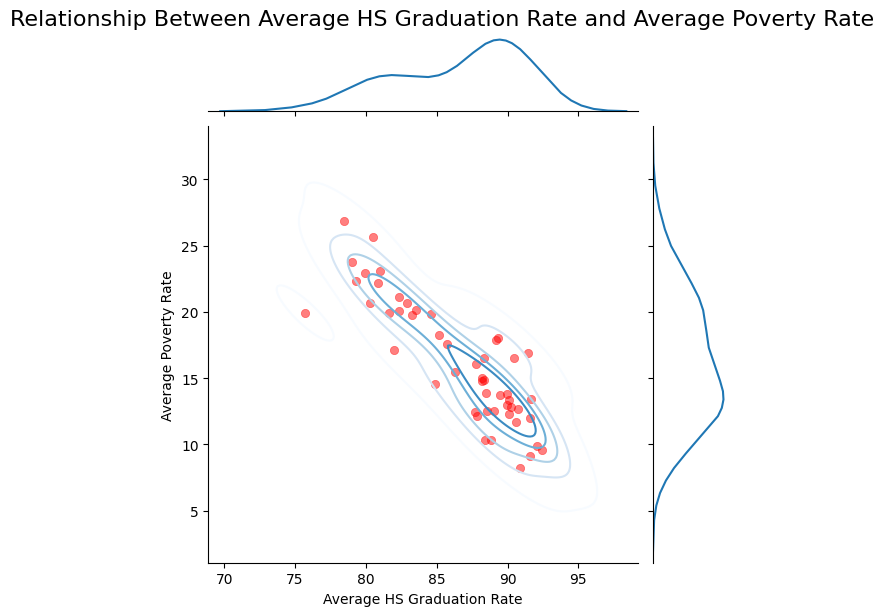

In [30]:
ax1 = sns.jointplot(df_combined,
                    x='Average HS Graduation Rate',
                    y='Average Poverty Rate',
                    kind='kde',
                    levels=6,
                    cmap='Blues')
sns.scatterplot(df_combined,
                x='Average HS Graduation Rate',
                y='Average Poverty Rate',
                ax=ax1.ax_joint,
                color='red',
                alpha=0.5,
                edgecolor=None)
plt.suptitle('Relationship Between Average HS Graduation Rate and Average Poverty Rate',
             y=1.02,
             fontsize=16)
plt.show()



#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

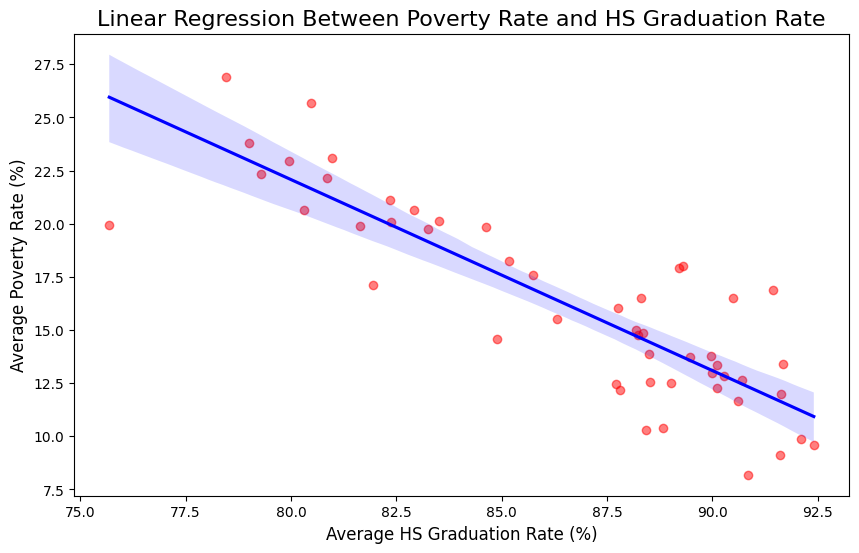

In [31]:
#chose regplot to have more customizable options
plt.figure(figsize=(10, 6))

sns.regplot(data=df_combined,
            x='Average HS Graduation Rate',
            y='Average Poverty Rate',
            scatter_kws={'alpha':0.5, 'color':'red'},
            line_kws={'color':'blue'},
            marker='o')
plt.title('Linear Regression Between Poverty Rate and HS Graduation Rate', fontsize=16)
plt.xlabel('Average HS Graduation Rate (%)', fontsize=12)
plt.ylabel('Average Poverty Rate (%)', fontsize=12)


plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [37]:
df_share_race_city.rename(columns={
    'share_white': 'White',
    'share_black': 'Black',
    'share_hispanic': 'Hispanic',
    'share_asian': 'Asian',
    'share_native_american': 'Native American'
}, inplace=True)
df_cols = ['White', 'Black', 'Hispanic', 'Asian', 'Native American']
def racial_makeup_per_state(df):
    df[df_cols] = df[df_cols].apply(pd.to_numeric, errors='coerce')
    avg_racial_makeup = df.groupby('Geographic area')[df_cols].mean().reset_index()
    avg_racial_makeup.columns = ['State']+ df_cols
    return avg_racial_makeup
avg_racial_makeup = racial_makeup_per_state(df_share_race_city)
# print(avg_racial_makeup)


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [39]:
fig = px.bar(avg_racial_makeup,
              x='State',
              y=df_cols,
              title='Racial Makeup of Each US State',
              labels={'value': 'Percentage (%)', 'State': 'US State'},
              color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
fig.update_layout(barmode='stack', xaxis_title='US State', yaxis_title='Percentage (%)',
                  xaxis_tickangle=-45, height=600)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [42]:
gender_counts = df_fatalities['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Number of Deaths']
# print(gender_counts)

  Gender  Number of Deaths
0      M              2428
1      F               107


In [43]:
fig = px.bar(gender_counts,
              x='Gender',
              y='Number of Deaths',
              title='Total Number of Deaths by Gender',
              labels={'Number of Deaths': 'Total Deaths', 'Gender': 'Gender'},
              color='Gender',
              color_discrete_sequence=['#1f77b4', '#ff7f0e'])
fig.update_layout(xaxis_title='Gender', yaxis_title='Total Deaths', height=400)

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [45]:
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')


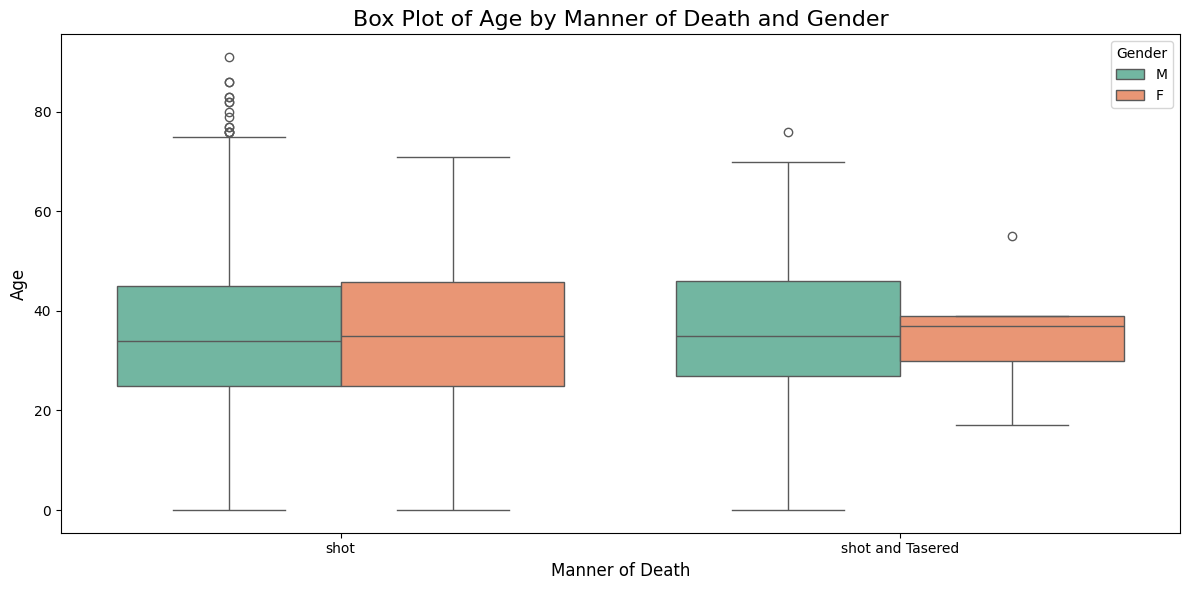

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fatalities, x='manner_of_death', y='age', hue='gender', palette='Set2')

plt.title('Box Plot of Age by Manner of Death and Gender', fontsize=16)
plt.xlabel('Manner of Death', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [49]:
unique_weapons = df_fatalities['armed'].unique()
# print("Unique values in the 'armed' column:", unique_weapons)

In [53]:
def classify_weapon_status(weapon):
    weapon_str = str(weapon).lower()
    if weapon_str == 'unarmed':
        return 'Unarmed'
    else:
        return 'Armed'
df_fatalities['Weapon Status'] = df_fatalities['armed'].apply(classify_weapon_status)

weapon_counts = df_fatalities['Weapon Status'].value_counts().reset_index()
weapon_counts.columns = ['Weapon Status', 'Count']
# print(weapon_counts)

  Weapon Status  Count
0         Armed   2364
1       Unarmed    171


In [54]:
total_killings = len(df_fatalities)
armed_count = weapon_counts[weapon_counts['Weapon Status'] == 'Armed']['Count'].values[0]
unarmed_count = weapon_counts[weapon_counts['Weapon Status'] == 'Unarmed']['Count'].values[0]
percentage_armed = (armed_count / total_killings) * 100

print(f"Total police killings: {total_killings}")
print(f"Number of armed individuals: {armed_count}")
print(f"Number of unarmed individuals: {unarmed_count}")
print(f"Percentage of police killings where individuals were armed: {percentage_armed:.2f}%")

Total police killings: 2535
Number of armed individuals: 2364
Number of unarmed individuals: 171
Percentage of police killings where individuals were armed: 93.25%


In [60]:
weapon_counts = df_fatalities['armed'].value_counts().reset_index()
weapon_counts.columns = ['Weapon Type', 'Count']
fig = px.bar(weapon_counts,
             x='Weapon Type',
             y='Count',
             title='Number of Killings by Weapon Type',
             labels={'Count': 'Number of Killings', 'Weapon Type': 'Type of Weapon'},
             color='Weapon Type',
             color_discrete_sequence=px.colors.qualitative.Plotly)

fig.show()

In [61]:
armed_with_gun_count = df_fatalities['armed'].str.contains('gun', case=False, na=False).sum()
unarmed_count = (df_fatalities['armed'].str.lower() == 'unarmed').sum()

total_count = len(df_fatalities)

armed_with_gun_percentage = (armed_with_gun_count / total_count) * 100
unarmed_percentage = (unarmed_count / total_count) * 100

print(f"Percentage of people killed by police armed with guns: {armed_with_gun_percentage:.2f}%")
print(f"Percentage of people killed by police who were unarmed: {unarmed_percentage:.2f}%")

Percentage of people killed by police armed with guns: 55.66%
Percentage of people killed by police who were unarmed: 6.75%


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [62]:
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

total_count = len(df_fatalities)
under_25_count = (df_fatalities['age'] < 25).sum()
under_25_percentage = (under_25_count / total_count) * 100

print(f"Percentage of people killed by police who were under 25 years old: {under_25_percentage:.2f}%")

Percentage of people killed by police who were under 25 years old: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

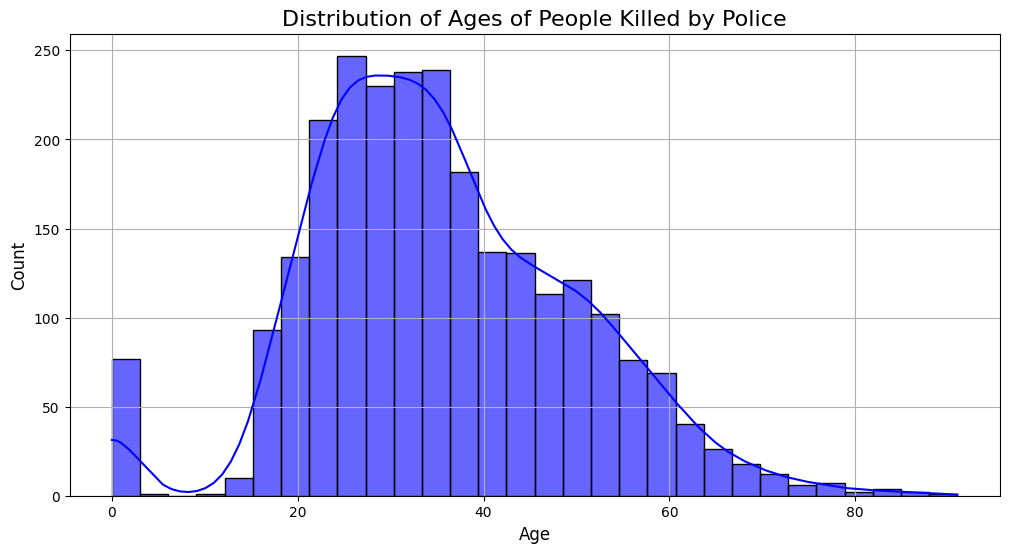

In [64]:
plt.figure(figsize=(12, 6))

sns.histplot(df_fatalities['age'], bins=30, kde=True, color='blue', alpha=0.6)

plt.title('Distribution of Ages of People Killed by Police', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [81]:
df_fatalities['race'].replace({'W': 'White', 'B': 'Black', 'N': 'Native American', 'A': 'Asian', 'H': 'Hispanic', 'O': 'Other'}, inplace=True)
df_fatalities_clean = df_fatalities.dropna(subset=['age', 'race'])
included_races = ['Asian', 'White', 'Hispanic', 'Black', 'Native American']
df_fatalities_clean = df_fatalities_clean[df_fatalities_clean['race'].isin(included_races)]

<ipython-input-81-17ccadd7823c>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





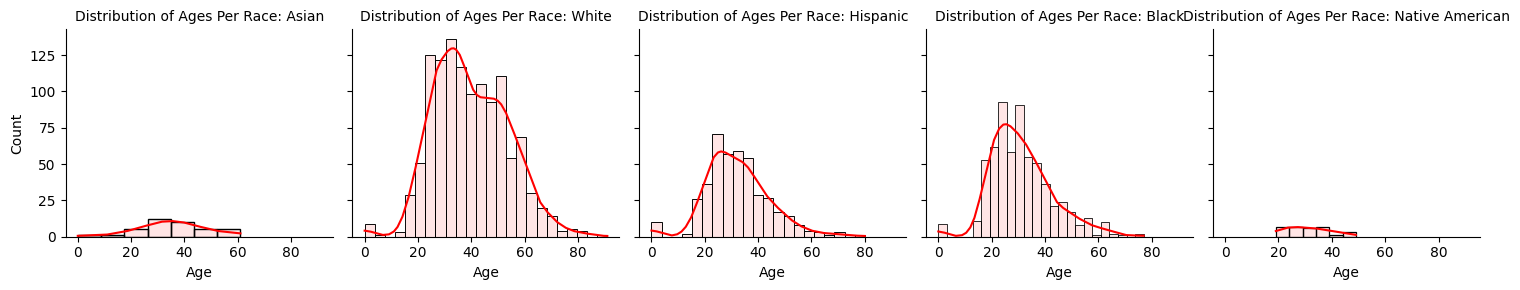

In [85]:
g = sns.FacetGrid(df_fatalities_clean, col="race")

g.map(sns.histplot, 'age', kde=True, color='red', alpha=0.1)

g.set_axis_labels('Age', 'Count')
g.set_titles('Distribution of Ages Per Race: {col_name}')

plt.tight_layout()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

<ipython-input-86-d90d52505fe9>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




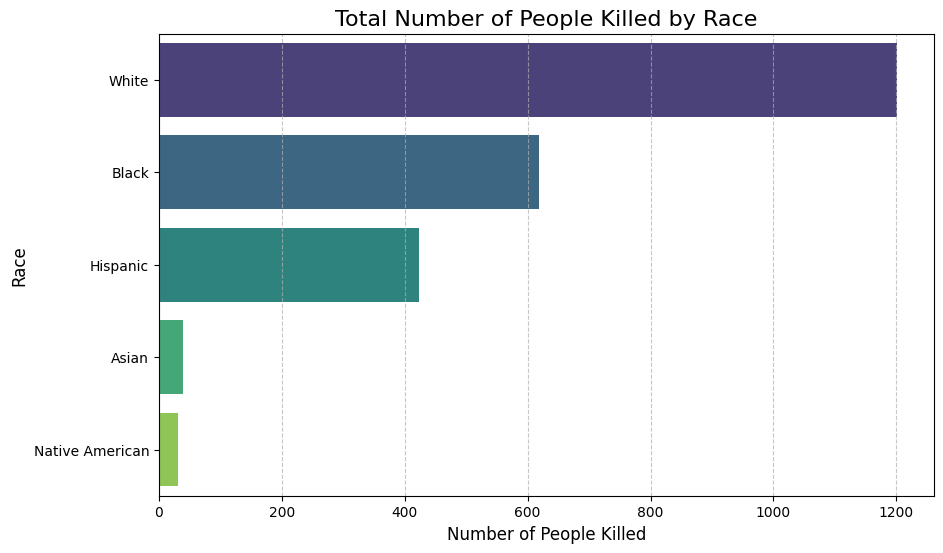

In [86]:
race_count = df_fatalities_clean['race'].value_counts().reset_index()
race_count.columns = ['Race', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Race', data=race_count, palette='viridis')

plt.title('Total Number of People Killed by Race', fontsize=16)
plt.xlabel('Number of People Killed', fontsize=12)
plt.ylabel('Race', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [87]:
df_fatalities_clean = df_fatalities.dropna(subset=['signs_of_mental_illness'])

mentally_ill_killed = df_fatalities_clean[df_fatalities_clean['signs_of_mental_illness'] == True].shape[0]

total_killed = df_fatalities_clean.shape[0]

percentage_mentally_ill = (mentally_ill_killed / total_killed) * 100

print(f"Percentage of people killed by police diagnosed with a mental illness: {percentage_mentally_ill:.2f}%")

Percentage of people killed by police diagnosed with a mental illness: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

<ipython-input-88-819682fd5ad3>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




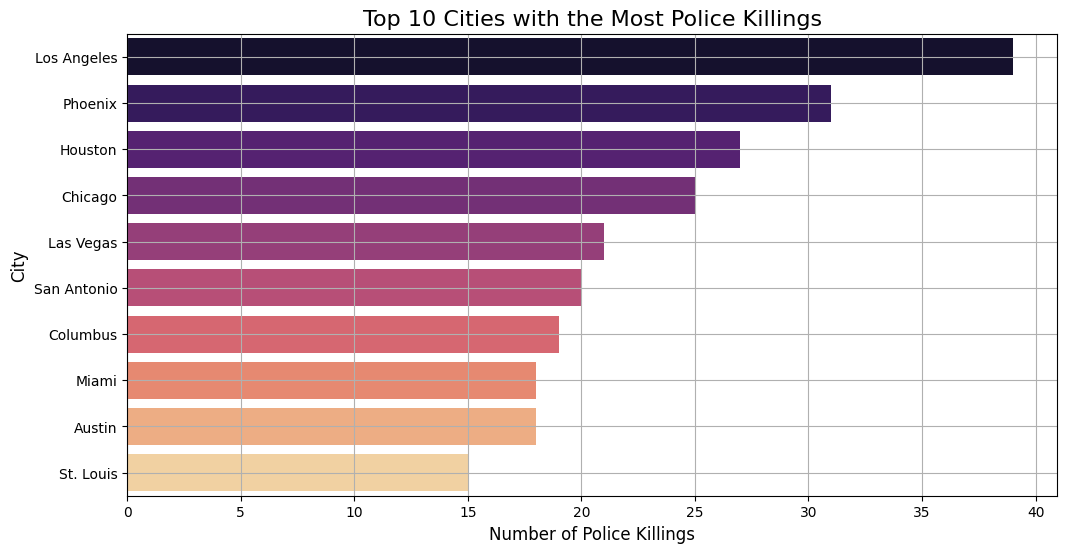

In [88]:
killings_per_city = df_fatalities.groupby('city').size().reset_index(name='count')

top_10_cities = killings_per_city.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='city', data=top_10_cities, palette='magma')

plt.title('Top 10 Cities with the Most Police Killings', fontsize=16)
plt.xlabel('Number of Police Killings', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.grid(True)

plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [89]:
killings_by_race_city = df_fatalities.groupby(['city', 'race']).size().reset_index(name='count')

top_10_cities_race = killings_by_race_city[killings_by_race_city['city'].isin(top_10_cities['city'])]
total_killings_city = df_fatalities[df_fatalities['city'].isin(top_10_cities['city'])].groupby('city').size()

top_10_cities_race['total_killings'] = top_10_cities_race['city'].map(total_killings_city)
top_10_cities_race['rate_by_race'] = (top_10_cities_race['count'] / top_10_cities_race['total_killings']) * 100

top_10_cities_race_sorted = top_10_cities_race.sort_values(by=['city', 'rate_by_race'], ascending=[True, False])

print(top_10_cities_race_sorted[['city', 'race', 'rate_by_race']])

             city             race  rate_by_race
84         Austin            White         72.22
82         Austin            Black         16.67
83         Austin         Hispanic         11.11
295       Chicago            Black         84.00
297       Chicago            White          8.00
294       Chicago                0          4.00
296       Chicago         Hispanic          4.00
354      Columbus            Black         57.89
356      Columbus            White         31.58
353      Columbus                0          5.26
355      Columbus            Other          5.26
722       Houston            Black         55.56
723       Houston         Hispanic         22.22
725       Houston            White         11.11
720       Houston                0          3.70
721       Houston            Asian          3.70
724       Houston  Native American          3.70
864     Las Vegas            White         42.86
863     Las Vegas         Hispanic         23.81
861     Las Vegas   

<ipython-input-89-ff65c45b45ee>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-89-ff65c45b45ee>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



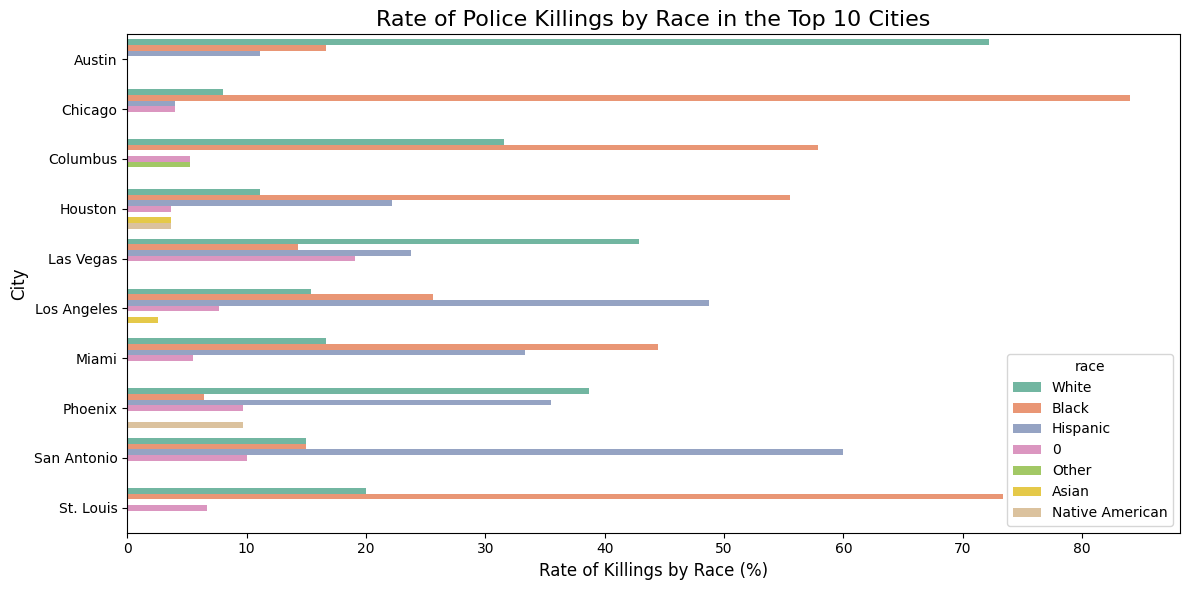

In [90]:
#made chart to visualize
plt.figure(figsize=(12, 6))
sns.barplot(x='rate_by_race', y='city', hue='race', data=top_10_cities_race_sorted, palette='Set2')

plt.title('Rate of Police Killings by Race in the Top 10 Cities', fontsize=16)
plt.xlabel('Rate of Killings by Race (%)', fontsize=12)
plt.ylabel('City', fontsize=12)

plt.tight_layout()
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [91]:
killings_by_state = df_fatalities.groupby('state').size().reset_index(name='killings_count')

fig = px.choropleth(killings_by_state,
                    locations='state',
                    locationmode='USA-states',
                    color='killings_count',
                    color_continuous_scale='Reds',
                    scope='usa',
                    labels={'killings_count': 'Police Killings'},
                    title='Police Killings by US State')

fig.show()

In [94]:
top_dangerous_states = killings_by_state.sort_values(by='killings_count', ascending=False).head(5)
print("Top 5 Most Dangerous States Based on Police Killings:")
print(top_dangerous_states)
print(f"highest poverty states:\n{avg_poverty_rate_sorted.head(5)['State']}")

Top 5 Most Dangerous States Based on Police Killings:
   state  killings_count
4     CA             424
43    TX             225
9     FL             154
3     AZ             118
35    OH              79
highest poverty states:
25    MS
3     AZ
10    GA
32    NM
2     AR
Name: State, dtype: object


only state in top 5 highest poverty that is also in the top 5 most dangerous states is AZ

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [99]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], errors='coerce')

killings_over_time = df_fatalities.groupby(df_fatalities['date'].dt.to_period("M")).size().reset_index(name='killings_count')
killings_over_time['date'] = killings_over_time['date'].dt.to_timestamp()

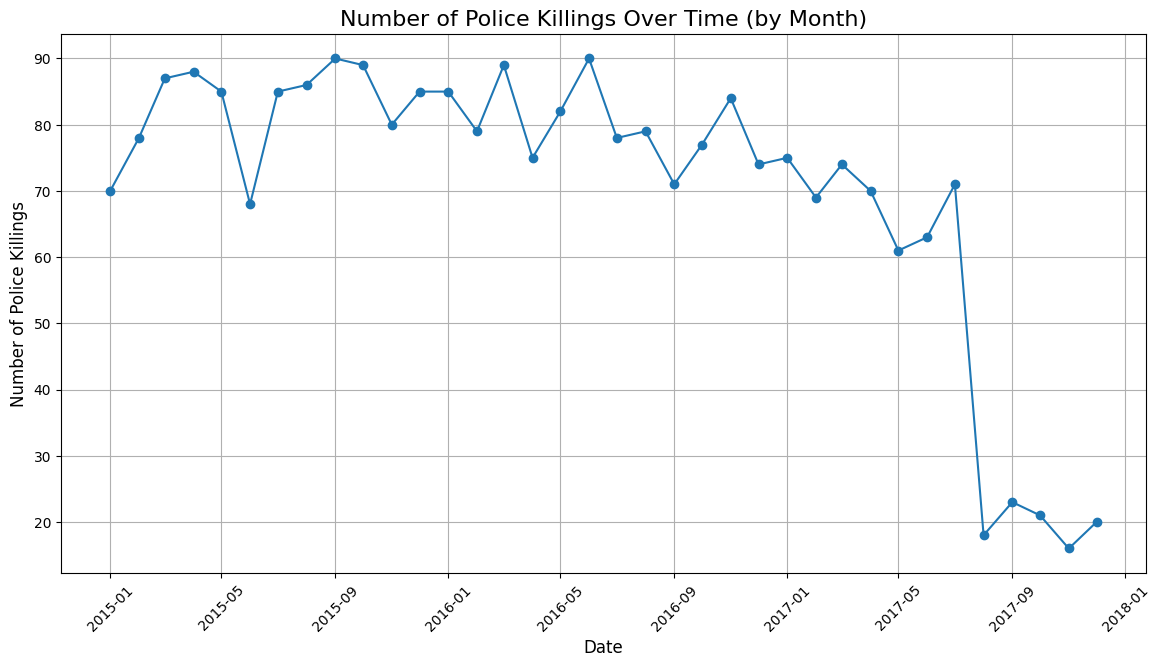

In [100]:
plt.figure(figsize=(14, 7))
plt.plot(killings_over_time['date'], killings_over_time['killings_count'], marker='o', linestyle='-')

plt.title('Number of Police Killings Over Time (by Month)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Police Killings', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [102]:
if len(killings_over_time) > 1:
    trend = 'increasing' if killings_over_time['killings_count'].iloc[-1] > killings_over_time['killings_count'].iloc[0] else 'decreasing'
    print(f"The trend in police killings from {killings_over_time['date'].iloc[0].date()} to {killings_over_time['date'].iloc[-1].date()} is {trend}.")

The trend in police killings from 2015-01-01 to 2017-12-01 is decreasing.


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

In [18]:
##would be interesting to do this now with the updated data from 2018 onward